In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')
import warnings
warnings.filterwarnings('ignore')

In [54]:
control_data = pd.read_csv('control_group.csv', sep=';')
test_data = pd.read_csv('test_group.csv', sep=';')

control_data.Date = pd.to_datetime(control_data.Date, format='%d.%m.%Y')
test_data.Date = pd.to_datetime(control_data.Date, format='%d.%m.%Y')

In [55]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
control_data.duplicated().sum(), test_data.duplicated().sum() 

(0, 0)

In [57]:
control_data.shape, test_data.shape

((30, 10), (30, 10))

In [59]:
cols = ['campaign_name', 'date', 'amount_spend', 'number_of_impressions', 'reach', 'website_clicks', 'number_of_searches', 
        'content_view', 'added_to_cart', 'purchases']

control_data.columns = cols
test_data.columns = cols

In [60]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   campaign_name          30 non-null     object        
 1   date                   30 non-null     datetime64[ns]
 2   amount_spend           30 non-null     int64         
 3   number_of_impressions  29 non-null     float64       
 4   reach                  29 non-null     float64       
 5   website_clicks         29 non-null     float64       
 6   number_of_searches     29 non-null     float64       
 7   content_view           29 non-null     float64       
 8   added_to_cart          29 non-null     float64       
 9   purchases              29 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ KB


In [61]:
control_data.isnull().sum(), test_data.isnull().sum() 

(campaign_name            0
 date                     0
 amount_spend             0
 number_of_impressions    1
 reach                    1
 website_clicks           1
 number_of_searches       1
 content_view             1
 added_to_cart            1
 purchases                1
 dtype: int64,
 campaign_name            0
 date                     0
 amount_spend             0
 number_of_impressions    0
 reach                    0
 website_clicks           0
 number_of_searches       0
 content_view             0
 added_to_cart            0
 purchases                0
 dtype: int64)

In [64]:
control_data["number_of_impressions"].fillna(value=control_data["number_of_impressions"].mean(), inplace=True)
control_data["reach"].fillna(value=control_data["reach"].mean(), inplace=True)
control_data["website_clicks"].fillna(value=control_data["website_clicks"].mean(), inplace=True)
control_data["number_of_searches"].fillna(value=control_data["number_of_searches"].mean(), inplace=True)
control_data["content_view"].fillna(value=control_data["content_view"].mean(), inplace=True)
control_data["added_to_cart"].fillna(value=control_data["added_to_cart"].mean(), inplace=True)
control_data["purchases"].fillna(value=control_data["purchases"].mean(), inplace=True)

- Отсутствуют дубликаты и nan-значения

## Visual Data Analysis ##

In [83]:
df.head(2)

,campaign_name,date,amount_spend,number_of_impressions,reach,website_clicks,number_of_searches,content_view,added_to_cart,purchases
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-08-01,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0


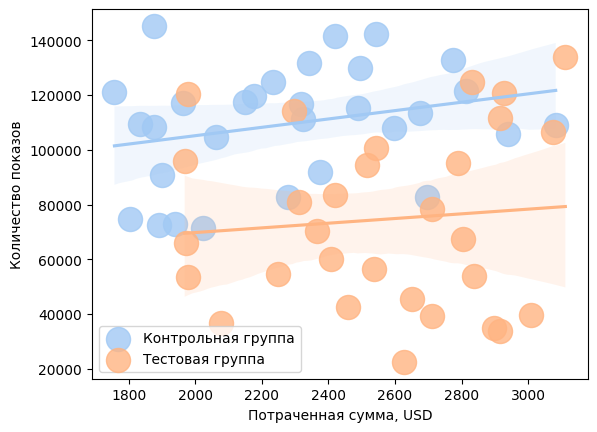

In [229]:
sns.regplot(control_data, x='amount_spend', 
            y='number_of_impressions', scatter_kws={'s':300}, label='Контрольная группа');
sns.regplot(test_data, x='amount_spend', 
            y='number_of_impressions', scatter_kws={'s':300}, label='Тестовая группа');

plt.legend();
plt.ylabel('Количество показов');
plt.xlabel('Потраченная сумма, USD');

- У обоих групп рост количества показов от потраченной суммы приблизительно одинаков

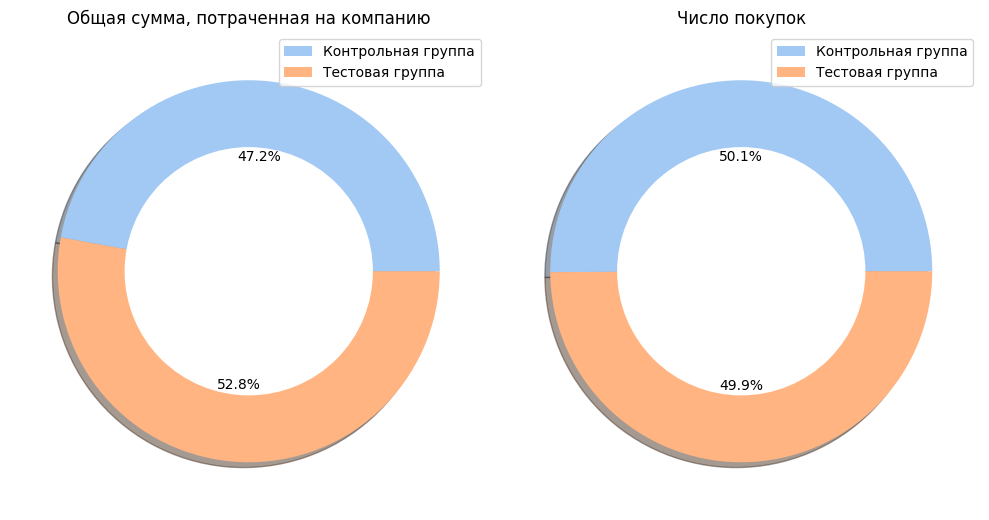

In [244]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].pie([sum(control_data['amount_spend']), sum(test_data['amount_spend'])], shadow=True, autopct='%.1f%%');
ax[0].legend(labels=['Контрольная группа', 'Тестовая группа']);

hole = plt.Circle((0, 0), 0.65, facecolor='white');
ax[0].add_artist(hole);
ax[0].set_title('Общая сумма, потраченная на компанию')

ax[1].pie([sum(control_data['purchases']), sum(test_data['purchases'])], shadow=True, autopct='%.1f%%');
ax[1].legend(labels=['Контрольная группа', 'Тестовая группа']);

hole = plt.Circle((0, 0), 0.65, facecolor='white');
ax[1].add_artist(hole);
ax[1].set_title('Число покупок');

plt.tight_layout()

- Число покупок у контрольной группы больше, чем у тестовой
- Однако на компанию тестовой группы была потрачена большая сумма
- В результате получаем, что покупки контрольной группы обошлись дешевле тестовой

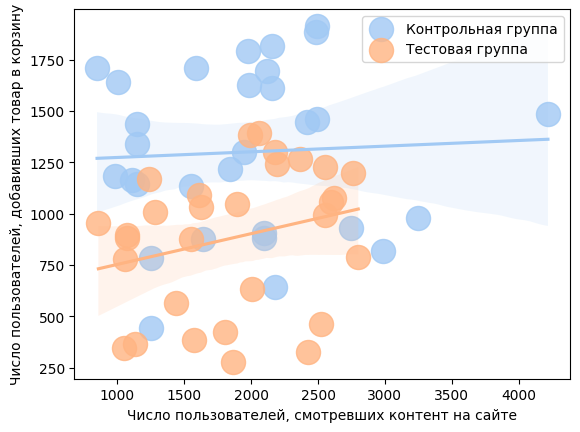

In [231]:
sns.regplot(control_data, x='content_view', 
            y='added_to_cart', scatter_kws={'s':300}, label='Контрольная группа');
sns.regplot(test_data, x='content_view', 
            y='added_to_cart', scatter_kws={'s':300}, label='Тестовая группа');

plt.legend();
plt.ylabel('Число пользователей, добавивших товар в корзину');
plt.xlabel('Число пользователей, смотревших контент на сайте');

- Тестовая группа чаще добавляет товар в корзину при просмотре сайта

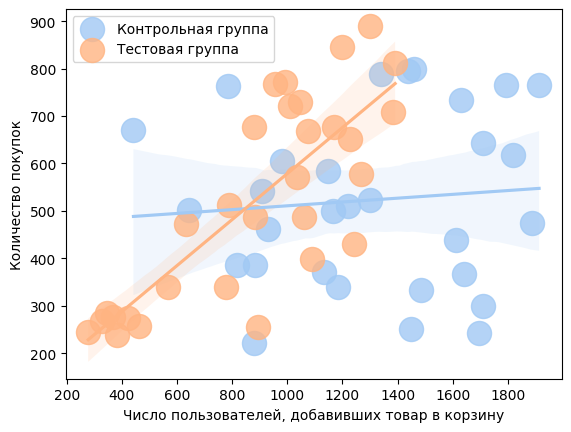

In [232]:
sns.regplot(control_data, x='added_to_cart', 
            y='purchases', scatter_kws={'s':300}, label='Контрольная группа');
sns.regplot(test_data, x='added_to_cart', 
            y='purchases', scatter_kws={'s':300}, label='Тестовая группа');

plt.legend();
plt.xlabel('Число пользователей, добавивших товар в корзину');
plt.ylabel('Количество покупок');

- Пользователи из тестовой группы чаще совершали покупку после добавления товара в корзину

## A/B testing ##

### T-test ###
Проведем Т-тест для конверсии и CTR

In [171]:
from scipy import stats

In [172]:
def t_test(treatment, control):
    t_statistic, p_value = stats.ttest_ind(treatment, control)
    print("Т-статистика:", t_statistic)
    print("P-value:", p_value)

    if p_value < 0.05 :    
        print('Отвергаем нулевую гипотезу, разница между групп значительна')
    else:
        print('Не отвергаем нулевую гипотезу, разница между группами незначительна')

    return t_statistic, p_value

In [176]:
print('Для конверсии: ', end='')
t_stat_conv, p_value_conv = t_test(control_data['purchases'], test_data['purchases'])
print('Для CTR: ', end='')
t_stat_ctr, p_value_ctr = t_test(control_data['website_clicks'], test_data['website_clicks'])

Для конверсии: Т-статистика: 0.03066909523750146
P-value: 0.9756387309702421
Не отвергаем нулевую гипотезу, разница между группами незначительна
Для CTR: Т-статистика: -1.6043359723468853
P-value: 0.11407207153213252
Не отвергаем нулевую гипотезу, разница между группами незначительна


- T-test не показал значительной разницы, однако даже статистически не значимая разница может иметь большое значение на практике. Посмотрим ближе на разницу конверсии и CTR

In [194]:
control_data['conversion'] = control_data['purchases'] / control_data['number_of_impressions'] * 100
test_data['conversion'] = test_data['purchases'] / test_data['number_of_impressions'] * 100

control_data['CTR'] = control_data['website_clicks'] / control_data['number_of_impressions'] * 100
test_data['CTR'] = test_data['website_clicks'] / test_data['number_of_impressions'] * 100

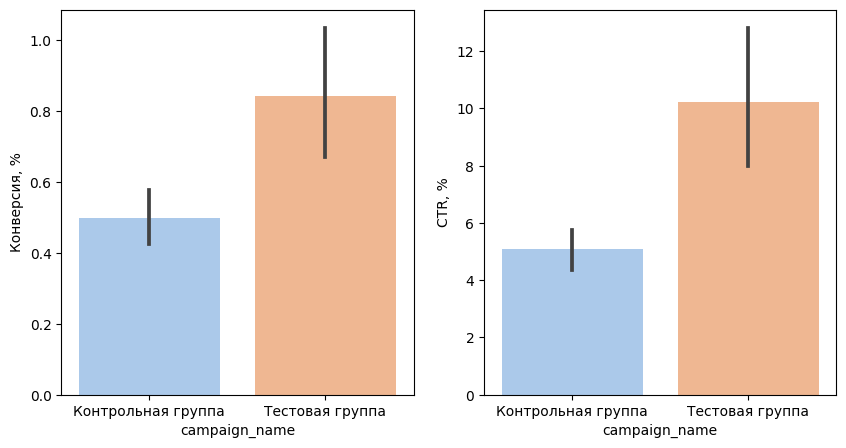

In [197]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.barplot(pd.concat([control_data, test_data]), y='conversion', x= 'campaign_name', ax=ax[0]);
sns.barplot(pd.concat([control_data, test_data]), y='CTR', x= 'campaign_name', ax=ax[1]);

ax[0].set_xticklabels(['Контрольная группа', 'Тестовая группа']);
ax[1].set_xticklabels(['Контрольная группа', 'Тестовая группа']);

ax[0].set_ylabel('Конверсия, %');
ax[1].set_ylabel('CTR, %');

- Конверсия и CTR выше у тестовой группы

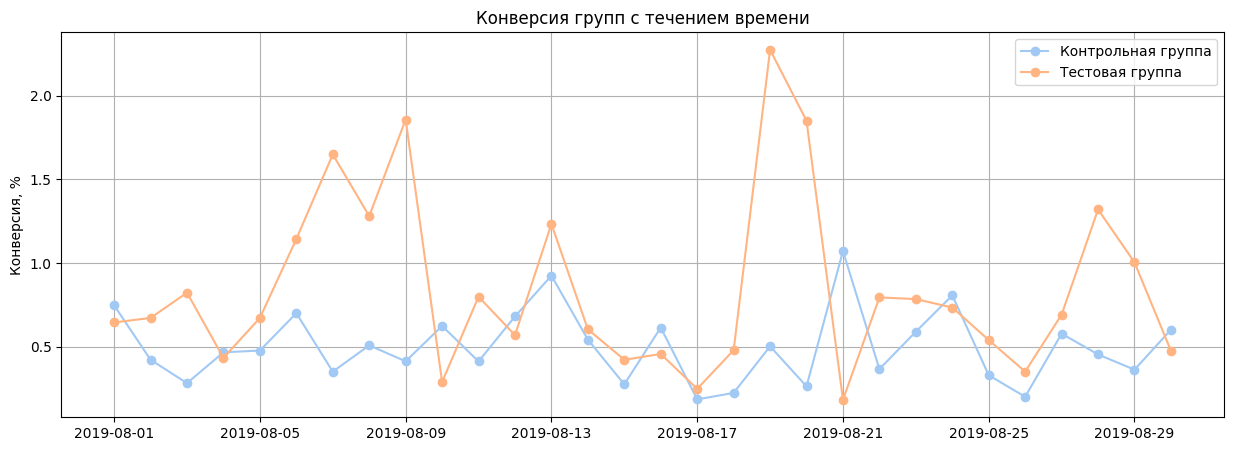

In [237]:
plt.figure(figsize=(15,5))
plt.plot(control_data['date'], control_data['conversion'], marker='o', label='Контрольная группа');
plt.plot(test_data['date'], test_data['conversion'], marker='o', label='Тестовая группа');

plt.ylabel('Конверсия, %');
plt.title('Конверсия групп с течением времени');
plt.legend();
plt.grid(True);

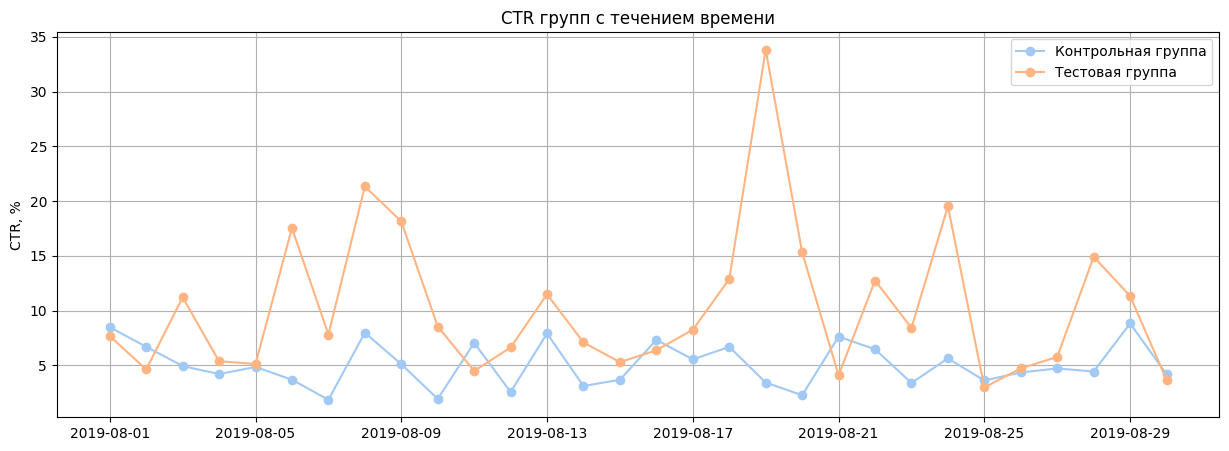

In [238]:
plt.figure(figsize=(15,5))
plt.plot(control_data['date'], control_data['CTR'], marker='o', label='Контрольная группа');
plt.plot(test_data['date'], test_data['CTR'], marker='o', label='Тестовая группа');

plt.ylabel('CTR, %')
plt.title('CTR групп с течением времени');
plt.legend();
plt.grid(True);

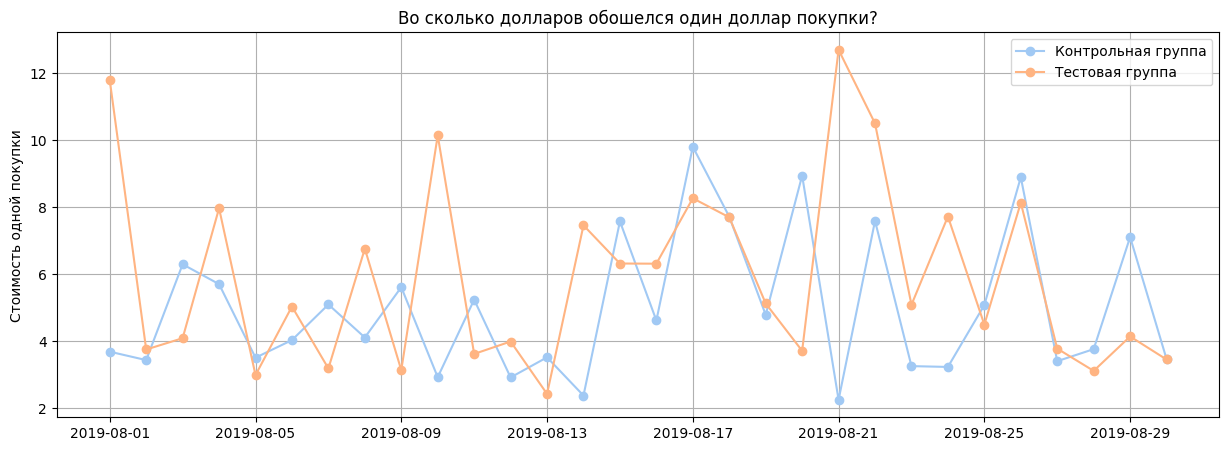

In [245]:
plt.figure(figsize=(15,5))
plt.plot(control_data['date'], control_data['amount_spend'] / control_data['purchases'], marker='o', label='Контрольная группа');
plt.plot(test_data['date'], test_data['amount_spend'] / test_data['purchases'], marker='o', label='Тестовая группа');

plt.grid(True);
plt.title('Во сколько долларов обошелся один доллар покупки?');
plt.legend();
plt.ylabel('Стоимость одной покупки');